#### 本次成绩:85  

### 评卷标准:
- 分析，理顺，项目要求并落实在文档中   ？
- 比较不同结果 ，思考，改进，总结。   √
- 成绩提交并截图成绩   √
- 最终结论，报告。    √ 有，但不够详实

总体过程都有涉及，项目，解决框架和思路还要再提升。这是高于技术层的方向。
另外kaggle成绩也看不到

# Kaggle Competition - House Prices: Advanced Regression Techniques

## 1. 导入数据

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


In [102]:
train_df = pd.read_csv('data/train.csv',index_col=0)
test_df = pd.read_csv('data/test.csv',index_col=0)

In [103]:
print(train_df.shape)
print(test_df.shape)

(1460, 80)
(1459, 79)


## 2.数据分析与处理

### 2.1 对测试集做处理

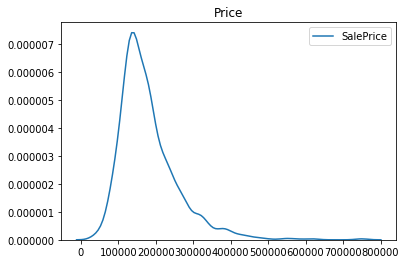

In [104]:
# 先把要预测的数据拿过来，对数据做归一化处理
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
sns.kdeplot(train_df["SalePrice"])
plt.title('Price');

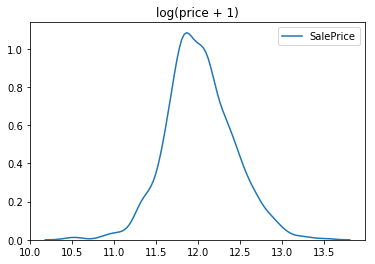

In [105]:
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
sns.kdeplot(np.log1p(train_df["SalePrice"]))
plt.title("log(price + 1)");

In [106]:
# 先把SlePrice去处理，方便后面数据处理
y_train = np.log1p(train_df.pop('SalePrice'))

In [107]:
# 把训练集和数据集合并，后面做同样的变换
all_df = pd.concat([train_df,test_df],axis=0)

In [108]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [109]:
# 剔除掉缺省值多的
all_df.pop('Alley')
all_df.pop('PoolQC')
all_df.pop('MiscFeature')
all_df.pop('Fence')

Id
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6       MnPrv
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15       GdWo
16      GdPrv
17        NaN
18        NaN
19        NaN
20      MnPrv
21        NaN
22      GdPrv
23        NaN
24        NaN
25      MnPrv
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
        ...  
2890    MnPrv
2891      NaN
2892      NaN
2893      NaN
2894      NaN
2895      NaN
2896      NaN
2897      NaN
2898      NaN
2899      NaN
2900      NaN
2901      NaN
2902      NaN
2903      NaN
2904      NaN
2905      NaN
2906      NaN
2907      NaN
2908      NaN
2909      NaN
2910      NaN
2911      NaN
2912      NaN
2913      NaN
2914    GdPrv
2915      NaN
2916      NaN
2917      NaN
2918    MnPrv
2919      NaN
Name: Fence, Length: 2919, dtype: object

In [111]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [121]:
all_df['SaleType'].dtype

dtype('O')

In [122]:
print(all_df.shape)
all_df.head()

(2919, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


### 2.2 对数据类型进行转化

In [123]:
# 查看类型，因为这个是是类别型数据，需要做变换，并且做one-hot encoding
all_df['MSSubClass'].dtypes

dtype('int64')

In [124]:
# 类型转换
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [125]:
# 做统计看，看一些数据分布
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [126]:
# le类别型数据，做变换。
pd.get_dummies(all_df['MSSubClass'],prefix = 'MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [143]:
# 对所有的类型变量做one-hot
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

# t通过one-hot后维度增加了好多

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


### 2.3 对缺失值进行填充

In [144]:
all_dummy_df.isnull().sum().sort_values(ascending = False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageArea        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageCars        1
dtype: int64

In [145]:
# 求均值
mean_cols = all_dummy_df.mean()
mean_cols.head(10) 


LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [146]:
# 用均值对数据进行填充
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [147]:
# 查看哪些是数值型数据
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### 2.4 对数值型数据，做归一化处理

In [148]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [149]:
# 归一化处理
all_dummy_df.loc[:, numeric_cols] = np.log1p(all_dummy_df.loc[:, numeric_cols])

In [150]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
2,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
3,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
4,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
5,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0


## 3. 建立模型

### 3.1 对数据进行切分

In [151]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [152]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 290), (1459, 290))

In [153]:
# 把数据转换成N寣Array
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [154]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

### 3.2 用Ridge Regression模型
* 用交叉验证法进行调参

In [155]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Alpha vs CV Error')

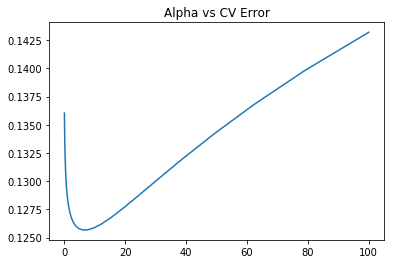

In [157]:
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')

*从图中可以看出，当取值大概在6-10的时候，score达到0.12一下

### 3.3 用Random Forest模型
* 用交叉验证进行调参

In [158]:
max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 200,max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

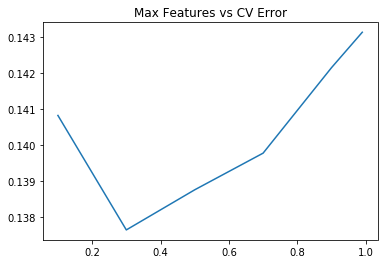

In [159]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

* 从图上看，大概在0.3左右取的最优值

## 4. 模型融合

In [29]:
# 通过上面，选取最优的参数，做最终的模型

ridge = Ridge(alpha=7)
rf = RandomForestRegressor(n_estimators=200, max_features=.3)

In [30]:
# 预测
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
# 对数据做还原
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

* 单模型

In [33]:

submission_data = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_final})

In [35]:
submission_data.head()

,Id,SalePrice
0,1461,124008.791622
1,1462,159214.604169
2,1463,181629.320009
3,1464,190307.763060
4,1465,198701.295469


In [36]:
submission_data.to_csv("output/pricesSalePrice-1.1.csv", sep=",")  

In [32]:
# 对两个模型做简单的操作，求平均

y_final = (y_ridge + y_rf) / 2

In [84]:
submission_data = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_ridge})

In [85]:
submission_data.head(10)

,Id,SalePrice
0,1461,123855.972028
1,1462,157278.666514
2,1463,182589.076719
3,1464,192981.591528
4,1465,197804.152921
5,1466,175056.600765
6,1467,171821.184137
7,1468,168057.714267
8,1469,187555.618971
9,1470,124881.674431


In [99]:
submission_data.to_csv("output/pricesSalePrice.csv", sep=",")  

## 总结
* 通过以上的实验，最后我用了两种模型来进行融合，但是效果没有单独使用Ridge Regression的模型效果好，所以在提交结构的时候提交了到模型的结果。效果还不是很好，但是最近要交毕设初稿没时间刷，但是通过这个入门项目，已经让我了解了大概的流程。